#  MACHINE LEARNING: Portugal Wine under Two Class approach for red and white classification using R and K fold cross-validation.
# Module 2: Solving Project with Original Dataset (df)

By: Hector Alvaro Rojas | Data Science, Visualizations and Applied Statistics | October 12, 2017<br>
Url: [http://www.arqmain.net]   &nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;   GitHub: [https://github.com/arqmain]
<hr>

## I Introduction

We consider the original dataset (wine) and we get ride off the variables "density" and "free.sulfor.dioxide" becouse they may cause problems of collinearity that can affect the normal operation of the algorithms since we are in the presence of double information.

As a consequence, we obtain the file "<b>df</b>" that goes on to represent the base with the original data pre-processed in a format ready to be used in the modeling.

## II Loading and the Data

In [117]:
# first remove ALL objects and close all possible connections
closeAllConnections()
rm(list = ls(all = TRUE)) # Does remove all inclusive hidden

# see your memory size
memory.size() 

In [2]:
# install packages and load libraries
ipak <- function(pkg){
    new.pkg <- pkg[!(pkg %in% installed.packages()[, "Package"])]
    if (length(new.pkg)) 
        install.packages(new.pkg, dependencies = c("Depends", "Suggests"))
    sapply(pkg, require, character.only = TRUE)
}
# usage
packages <- c("plyr", "dplyr", "caret")
ipak(packages)


Loading required package: plyr
Loading required package: dplyr

Attaching package: 'dplyr'

The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: caret
Loading required package: lattice
Loading required package: ggplot2


plyr dplyr caret 
 TRUE  TRUE  TRUE

In [3]:
# define path location of datasets
wine1.url <- "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
wine2.url <- "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

# read datasets
wine1 <- read.csv(wine1.url, header=TRUE, sep=';')
wine2 <- read.csv(wine2.url, header=TRUE, sep=';')

# create dataset base
paso <- rbind(cbind(wine1, Class='white'), cbind(wine2, Class='red'))

df= subset(paso, select=c('fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar', 'chlorides' ,'total.sulfur.dioxide','pH', 'sulphates', 'alcohol', 'quality', 'Class'))
attach(df)
head(df)
rm("paso")

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,total.sulfur.dioxide,pH,sulphates,alcohol,quality,Class
7.0,0.27,0.36,20.7,0.045,170,3.00,0.45,8.8,6,white
6.3,0.30,0.34,1.6,0.049,132,3.30,0.49,9.5,6,white
8.1,0.28,0.40,6.9,0.050,97,3.26,0.44,10.1,6,white
7.2,0.23,0.32,8.5,0.058,186,3.19,0.40,9.9,6,white
7.2,0.23,0.32,8.5,0.058,186,3.19,0.40,9.9,6,white
8.1,0.28,0.40,6.9,0.050,97,3.26,0.44,10.1,6,white


In [5]:
# verify response variable "Class" as factor. Remember, the class factor is always used for categorical variables.
df$Class <- as.factor(df$Class)

In [34]:
# get some information about the dataset
str(df)

'data.frame':	6497 obs. of  11 variables:
 $ fixed.acidity       : num  7 6.3 8.1 7.2 7.2 8.1 6.2 7 6.3 8.1 ...
 $ volatile.acidity    : num  0.27 0.3 0.28 0.23 0.23 0.28 0.32 0.27 0.3 0.22 ...
 $ citric.acid         : num  0.36 0.34 0.4 0.32 0.32 0.4 0.16 0.36 0.34 0.43 ...
 $ residual.sugar      : num  20.7 1.6 6.9 8.5 8.5 6.9 7 20.7 1.6 1.5 ...
 $ chlorides           : num  0.045 0.049 0.05 0.058 0.058 0.05 0.045 0.045 0.049 0.044 ...
 $ total.sulfur.dioxide: num  170 132 97 186 186 97 136 170 132 129 ...
 $ pH                  : num  3 3.3 3.26 3.19 3.19 3.26 3.18 3 3.3 3.22 ...
 $ sulphates           : num  0.45 0.49 0.44 0.4 0.4 0.44 0.47 0.45 0.49 0.45 ...
 $ alcohol             : num  8.8 9.5 10.1 9.9 9.9 10.1 9.6 8.8 9.5 11 ...
 $ quality             : int  6 6 6 6 6 6 6 6 6 6 ...
 $ Class               : Factor w/ 2 levels "white","red": 1 1 1 1 1 1 1 1 1 1 ...


## III Getting train and test datasets

In [6]:
#stratified sampling to get the train and test dataset
set.seed(7) # Set Seed so that same sample can be reproduced in future also
# considering response variable as strata
data_part <- createDataPartition(y = df$Class,  p = 0.70, list = F)
testing <- df[-data_part,] # 30% data goes here
training <- df[data_part,] # 70% here

length(training$Class)
length(testing$Class)

# training$quality <- NULL
# testing$quality <- NULL

[1] 4549

[1] 1948

In [36]:
#taking a look of the train and test dataset by columns 
head(training)
head(testing)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,total.sulfur.dioxide,pH,sulphates,alcohol,quality,Class
2,6.3,0.30,0.34,1.6,0.049,132,3.30,0.49,9.5,6,white
3,8.1,0.28,0.40,6.9,0.050,97,3.26,0.44,10.1,6,white
7,6.2,0.32,0.16,7.0,0.045,136,3.18,0.47,9.6,6,white
8,7.0,0.27,0.36,20.7,0.045,170,3.00,0.45,8.8,6,white
9,6.3,0.30,0.34,1.6,0.049,132,3.30,0.49,9.5,6,white
10,8.1,0.22,0.43,1.5,0.044,129,3.22,0.45,11.0,6,white


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,total.sulfur.dioxide,pH,sulphates,alcohol,quality,Class
1,7.0,0.27,0.36,20.7,0.045,170,3.00,0.45,8.8,6,white
4,7.2,0.23,0.32,8.5,0.058,186,3.19,0.40,9.9,6,white
5,7.2,0.23,0.32,8.5,0.058,186,3.19,0.40,9.9,6,white
6,8.1,0.28,0.40,6.9,0.050,97,3.26,0.44,10.1,6,white
18,6.2,0.66,0.48,1.2,0.029,75,3.33,0.39,12.8,8,white
20,6.5,0.31,0.14,7.5,0.044,133,3.22,0.50,9.5,5,white


In [37]:
# get some information about training dataset
str(training[,1:11])

'data.frame':	4549 obs. of  11 variables:
 $ fixed.acidity       : num  6.3 8.1 6.2 7 6.3 8.1 8.1 8.6 7.9 6.6 ...
 $ volatile.acidity    : num  0.3 0.28 0.32 0.27 0.3 0.22 0.27 0.23 0.18 0.16 ...
 $ citric.acid         : num  0.34 0.4 0.16 0.36 0.34 0.43 0.41 0.4 0.37 0.4 ...
 $ residual.sugar      : num  1.6 6.9 7 20.7 1.6 1.5 1.45 4.2 1.2 1.5 ...
 $ chlorides           : num  0.049 0.05 0.045 0.045 0.049 0.044 0.033 0.035 0.04 0.044 ...
 $ total.sulfur.dioxide: num  132 97 136 170 132 129 63 109 75 143 ...
 $ pH                  : num  3.3 3.26 3.18 3 3.3 3.22 2.99 3.14 3.18 3.54 ...
 $ sulphates           : num  0.49 0.44 0.47 0.45 0.49 0.45 0.56 0.53 0.63 0.52 ...
 $ alcohol             : num  9.5 10.1 9.6 8.8 9.5 11 12 9.7 10.8 12.4 ...
 $ quality             : int  6 6 6 6 6 6 5 5 5 7 ...
 $ Class               : Factor w/ 2 levels "white","red": 1 1 1 1 1 1 1 1 1 1 ...


In [38]:
# get some information about testing dataset
str(testing[,1:11])

'data.frame':	1948 obs. of  11 variables:
 $ fixed.acidity       : num  7 7.2 7.2 8.1 6.2 6.5 6.8 6.6 7.2 6.2 ...
 $ volatile.acidity    : num  0.27 0.23 0.23 0.28 0.66 0.31 0.26 0.27 0.32 0.12 ...
 $ citric.acid         : num  0.36 0.32 0.32 0.4 0.48 0.14 0.42 0.41 0.36 0.34 ...
 $ residual.sugar      : num  20.7 8.5 8.5 6.9 1.2 7.5 1.7 1.3 2 1.5 ...
 $ chlorides           : num  0.045 0.058 0.058 0.05 0.029 0.044 0.049 0.052 0.033 0.045 ...
 $ total.sulfur.dioxide: num  170 186 186 97 75 133 122 142 114 117 ...
 $ pH                  : num  3 3.19 3.19 3.26 3.33 3.22 3.47 3.42 3.1 3.42 ...
 $ sulphates           : num  0.45 0.4 0.4 0.44 0.39 0.5 0.48 0.47 0.71 0.51 ...
 $ alcohol             : num  8.8 9.9 9.9 10.1 12.8 9.5 10.5 10 12.3 9 ...
 $ quality             : int  6 6 6 6 8 5 8 6 7 6 ...
 $ Class               : Factor w/ 2 levels "white","red": 1 1 1 1 1 1 1 1 1 1 ...


In [1]:
#summarize full dataset by columns 
propmiss <- function(dataframe) {
	m <- sapply(dataframe, function(x) {
		data.frame(
			n=length(!is.na(x)), 
			nmiss=sum(is.na(x)), 
			propmiss=sum(is.na(x))/length(x),
			P25=round(quantile(x, 0.25, na.rm=TRUE),2),
			P75=round(quantile(x, 0.75, na.rm=TRUE),2),            
			IQR=round(IQR(x, na.rm=TRUE),2),
			Threshold= round(quantile(x, 0.75, na.rm=TRUE),2) + 1.5*round(IQR(x, na.rm=TRUE),2),            
			Minimum=round(min(x, na.rm=TRUE),2),
			Median=round(median(x, na.rm=TRUE),2),            
			Maximum=round(max(x, na.rm=TRUE),2),
			Range=round(max(x, na.rm=TRUE)-min(x, na.rm=TRUE),2),
			Mean=round(mean(x, na.rm=TRUE),2),
			StDev=round(sd(x, na.rm=TRUE),2)
		)
	})
	d <- data.frame(t(m))
	d <- sapply(d, unlist)
	d <- as.data.frame(d)
	d$variable <- row.names(d)
	row.names(d) <- NULL
	d <- cbind(d[ncol(d)],d[-ncol(d)])
	return(d[order(d$propmiss), ])
}

In [39]:
# summarize training dataset
(summary=propmiss(training[,-11])[,-(3:4)][,-6])

variable,n,P25,P75,IQR,Minimum,Median,Maximum,Range,Mean,StDev
fixed.acidity,4549,6.40,7.60,1.20,4.20,7.00,15.90,11.70,7.20,1.27
volatile.acidity,4549,0.23,0.41,0.18,0.08,0.30,1.58,1.50,0.34,0.17
citric.acid,4549,0.24,0.39,0.15,0.00,0.31,1.66,1.66,0.32,0.14
residual.sugar,4549,1.80,8.10,6.30,0.60,2.90,65.80,65.20,5.43,4.79
chlorides,4549,0.04,0.06,0.03,0.01,0.05,0.61,0.60,0.06,0.04
total.sulfur.dioxide,4549,78.00,156.00,78.00,6.00,119.00,440.00,434.00,116.16,56.48
pH,4549,3.11,3.32,0.21,2.72,3.20,4.01,1.29,3.22,0.16
sulphates,4549,0.43,0.60,0.17,0.22,0.51,2.00,1.78,0.53,0.15
alcohol,4549,9.50,11.30,1.80,8.00,10.30,14.90,6.90,10.50,1.19
quality,4549,5.00,6.00,1.00,3.00,6.00,9.00,6.00,5.82,0.88


In [40]:
# summarize testing dataset
(summary=propmiss(testing[,-11])[,-(3:4)][,-6])

variable,n,P25,P75,IQR,Minimum,Median,Maximum,Range,Mean,StDev
fixed.acidity,1948,6.40,7.80,1.40,3.80,7.00,15.60,11.80,7.26,1.35
volatile.acidity,1948,0.23,0.40,0.17,0.08,0.29,1.33,1.25,0.33,0.16
citric.acid,1948,0.25,0.40,0.15,0.00,0.31,1.00,1.00,0.32,0.15
residual.sugar,1948,1.80,8.10,6.30,0.60,3.20,22.60,22.00,5.47,4.69
chlorides,1948,0.04,0.06,0.03,0.01,0.05,0.47,0.46,0.06,0.03
total.sulfur.dioxide,1948,75.75,155.00,79.25,6.00,117.00,344.00,338.00,114.77,56.62
pH,1948,3.10,3.32,0.22,2.79,3.21,3.90,1.11,3.22,0.16
sulphates,1948,0.43,0.60,0.17,0.25,0.50,1.56,1.31,0.53,0.15
alcohol,1948,9.50,11.30,1.80,8.00,10.30,14.05,6.05,10.47,1.20
quality,1948,5.00,6.00,1.00,3.00,6.00,9.00,6.00,5.82,0.85


## IV Building models
 
I have considered linear (LR and LDA), nonlinear (KNN, CART, RF, NB, and SVM) algorithms. I use "set.seed(7)" so that same sample can be reproduced in the future and also it ensures the results are directly comparable.

### 41 CART

In [7]:
## Control Resampling Technique: 10-fold CV
cvCtrl <- trainControl(method = "cv", number=10, summaryFunction = twoClassSummary, classProbs = TRUE)

In [8]:
## Construction Predictive Model
set.seed(1)
rpartTune <- train(Class ~ ., data = training, method = "rpart", tuneLength = 30, preProc = c("center", "scale"), metric = "ROC",  trControl = cvCtrl)

Loading required package: rpart


In [9]:
## train results
rpartTune

CART 

4549 samples
  10 predictor
   2 classes: 'white', 'red' 

Pre-processing: centered (10), scaled (10) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 4094, 4094, 4095, 4094, 4094, 4094, ... 
Resampling results across tuning parameters:

  cp          ROC        Sens       Spec     
  0.00000000  0.9878478  0.9839582  0.9607143
  0.02358374  0.9755545  0.9810453  0.9339286
  0.04716749  0.9758366  0.9755034  0.9357143
  0.07075123  0.8976229  0.9769645  0.8008929
  0.09433498  0.8976229  0.9769645  0.8008929
  0.11791872  0.8847864  0.9454657  0.8241071
  0.14150246  0.8847864  0.9454657  0.8241071
  0.16508621  0.8847864  0.9454657  0.8241071
  0.18866995  0.8847864  0.9454657  0.8241071
  0.21225369  0.8847864  0.9454657  0.8241071
  0.23583744  0.8847864  0.9454657  0.8241071
  0.25942118  0.8847864  0.9454657  0.8241071
  0.28300493  0.8847864  0.9454657  0.8241071
  0.30658867  0.8847864  0.9454657  0.8241071
  0.33017241  0.8847864  0.9454657  0.8241071
  0

In [45]:
rpartTune$bestTune

cp
0


In [46]:
head(rpartTune$results)

cp,ROC,Sens,Spec,ROCSD,SensSD,SpecSD
0.00000000,0.9878478,0.9839582,0.9607143,0.007702258,0.012005679,0.01276643
0.02358374,0.9755545,0.9810453,0.9339286,0.006364581,0.009444961,0.03319487
0.04716749,0.9758366,0.9755034,0.9357143,0.007139131,0.010662646,0.03440044
0.07075123,0.8976229,0.9769645,0.8008929,0.034410621,0.013975560,0.04649911
0.09433498,0.8976229,0.9769645,0.8008929,0.034410621,0.013975560,0.04649911
0.11791872,0.8847864,0.9454657,0.8241071,0.025983959,0.012820212,0.06114605


In [47]:
(rpartTune$results)[1,]

cp,ROC,Sens,Spec,ROCSD,SensSD,SpecSD
0,0.9878478,0.9839582,0.9607143,0.007702258,0.01200568,0.01276643


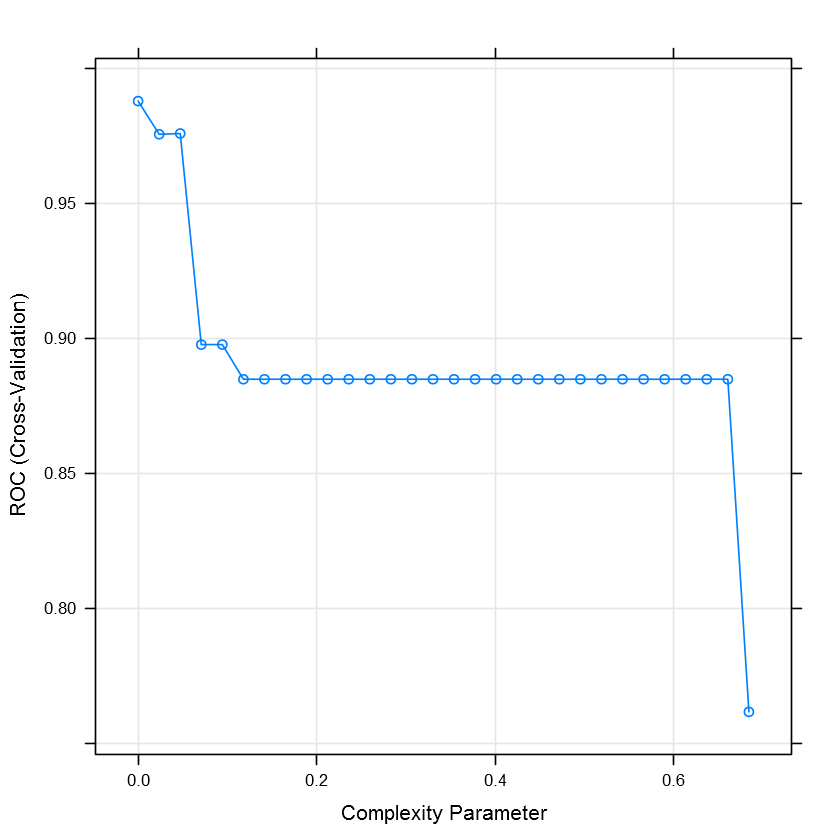

In [48]:
## Plot train tune
plot(rpartTune)

In [10]:
## Test Set Results   
rpartPred <- predict(rpartTune, testing)
confusionMatrix(rpartPred, testing$Class)

Confusion Matrix and Statistics

          Reference
Prediction white  red
     white  1444   23
     red      25  456
                                          
               Accuracy : 0.9754          
                 95% CI : (0.9675, 0.9818)
    No Information Rate : 0.7541          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9337          
 Mcnemar's Test P-Value : 0.8852          
                                          
            Sensitivity : 0.9830          
            Specificity : 0.9520          
         Pos Pred Value : 0.9843          
         Neg Pred Value : 0.9480          
             Prevalence : 0.7541          
         Detection Rate : 0.7413          
   Detection Prevalence : 0.7531          
      Balanced Accuracy : 0.9675          
                                          
       'Positive' Class : white           
                                          

In [11]:
## Predicting Class Probabilities
rpartProbs <- predict(rpartTune, testing, type = "prob")
head(rpartProbs)

,white,red
1,0.9977034,0.002296588
4,0.9977034,0.002296588
5,0.9977034,0.002296588
6,0.9977034,0.002296588
18,0.9977034,0.002296588
20,0.9977034,0.002296588


In [52]:
# variable importance
cart.imp = varImp ( rpartTune , scale = F )
cart.imp

rpart variable importance

                     Overall
total.sulfur.dioxide 1496.36
chlorides            1158.30
volatile.acidity      928.06
sulphates             568.23
fixed.acidity         373.67
residual.sugar        175.68
pH                    154.50
citric.acid            70.34
alcohol                23.74
quality                14.32

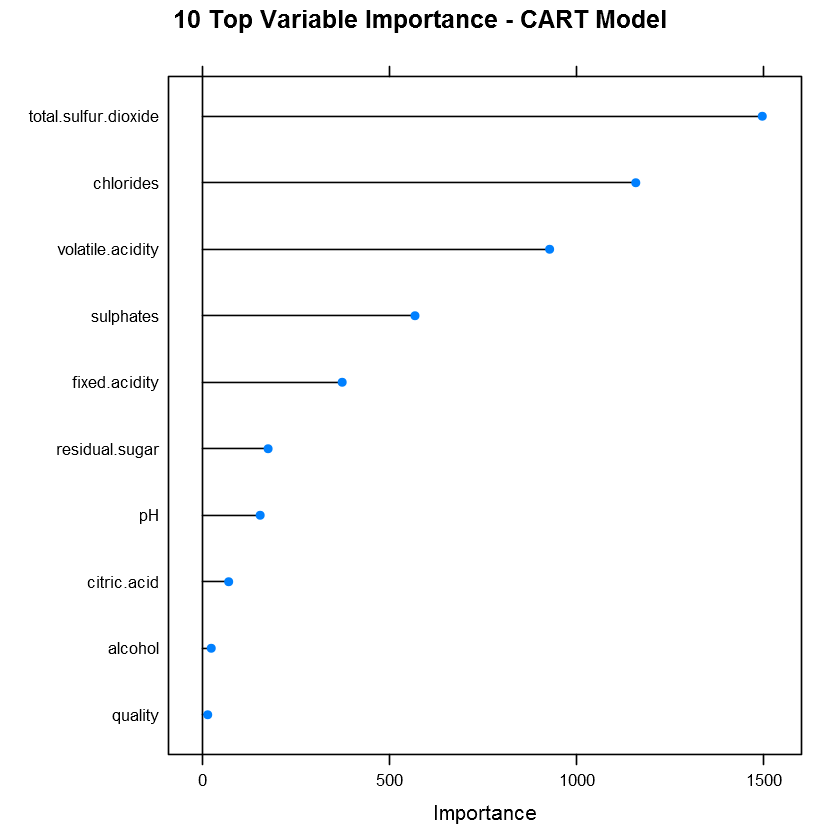

In [53]:
## Graphic variable importance
# dev.new()
plot(cart.imp, top=10, main="10 Top Variable Importance - CART Model")

### 42 Boosted Trees C5.0 (C5)

In [54]:
## Control Resampling Technique: 10-fold CV
cvCtrl <- trainControl(method = "cv", number=10, summaryFunction = twoClassSummary, classProbs = TRUE)

In [55]:
## Control Grid
grid <- expand.grid(.model = "tree", .trials = c(1,5,10,15,20), .winnow = FALSE)

In [56]:
## Construction Predictive Model
set.seed(1)
c5Tune <- train(Class ~ ., data = training, method = "C5.0", metric = "ROC", preProc = c("center", "scale"), tuneGrid = grid, trControl = cvCtrl)

Loading required package: C50
Loading required package: plyr


In [57]:
## train results
c5Tune

C5.0 

4549 samples
  10 predictor
   2 classes: 'white', 'red' 

Pre-processing: centered (10), scaled (10) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 4094, 4094, 4095, 4094, 4094, 4094, ... 
Resampling results across tuning parameters:

  trials  ROC        Sens       Spec     
   1      0.9923490  0.9909604  0.9714286
   5      0.9976882  0.9932919  0.9812500
  10      0.9982203  0.9953327  0.9866071
  15      0.9982632  0.9950412  0.9883929
  20      0.9985989  0.9953327  0.9857143

Tuning parameter 'model' was held constant at a value of tree
Tuning
 parameter 'winnow' was held constant at a value of FALSE
ROC was used to select the optimal model using  the largest value.
The final values used for the model were trials = 20, model = tree and winnow
 = FALSE.

In [58]:
c5Tune$bestTune

,trials,model,winnow
5,20,tree,FALSE


In [59]:
head(c5Tune$results)

model,winnow,trials,ROC,Sens,Spec,ROCSD,SensSD,SpecSD
tree,FALSE,1,0.9923490,0.9909604,0.9714286,0.004110168,0.004649226,0.010136540
tree,FALSE,5,0.9976882,0.9932919,0.9812500,0.003210743,0.004358289,0.016543979
tree,FALSE,10,0.9982203,0.9953327,0.9866071,0.002652599,0.004802846,0.008677012
tree,FALSE,15,0.9982632,0.9950412,0.9883929,0.002597006,0.004359429,0.008470387
tree,FALSE,20,0.9985989,0.9953327,0.9857143,0.002067784,0.003938514,0.012052653


In [60]:
(c5Tune$results)[5,]

,model,winnow,trials,ROC,Sens,Spec,ROCSD,SensSD,SpecSD
5,tree,FALSE,20,0.9985989,0.9953327,0.9857143,0.002067784,0.003938514,0.01205265


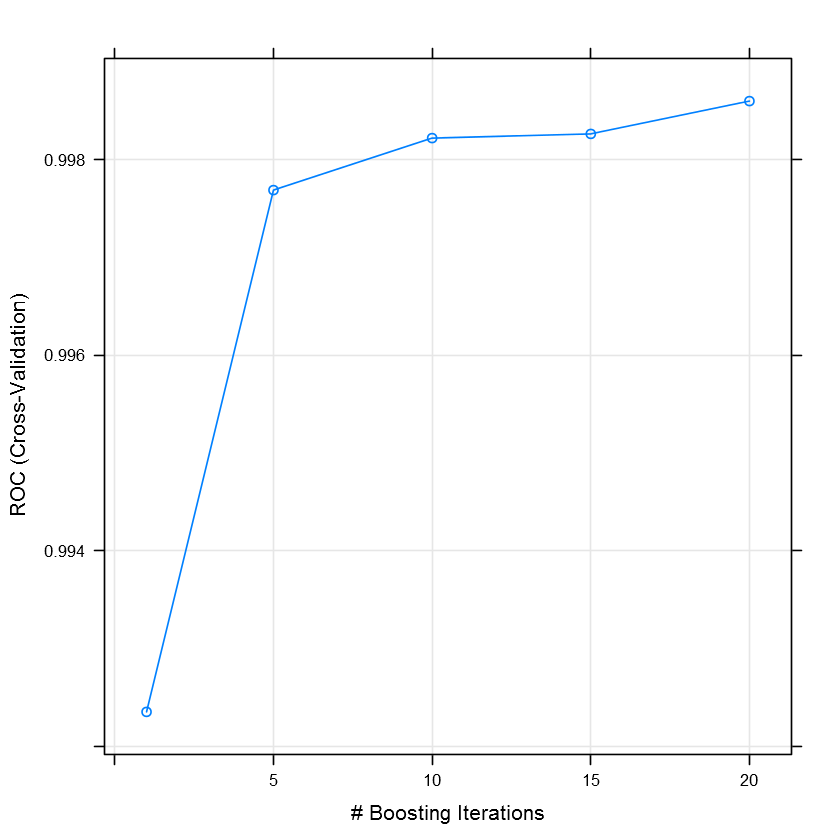

In [61]:
## Plot train tune
plot(c5Tune)

In [62]:
## Test Set Results
c5Pred <- predict(c5Tune, testing, preProc = c("center", "scale"))
confusionMatrix(c5Pred, testing$Class)

Confusion Matrix and Statistics

          Reference
Prediction white  red
     white  1467   10
     red       2  469
                                          
               Accuracy : 0.9938          
                 95% CI : (0.9893, 0.9968)
    No Information Rate : 0.7541          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.9833          
 Mcnemar's Test P-Value : 0.04331         
                                          
            Sensitivity : 0.9986          
            Specificity : 0.9791          
         Pos Pred Value : 0.9932          
         Neg Pred Value : 0.9958          
             Prevalence : 0.7541          
         Detection Rate : 0.7531          
   Detection Prevalence : 0.7582          
      Balanced Accuracy : 0.9889          
                                          
       'Positive' Class : white           
                                          

In [63]:
## Predicting Class Probabilities
c5Probs <- predict(c5Tune, testing, preProc = c("center", "scale"), type = "prob")
head(c5Probs, 3)

,white,red
1,1,0
4,1,0
5,1,0


In [65]:
## variable importance
c5.imp = varImp ( c5Tune , scale = F)
c5.imp


C5.0 variable importance

                     Overall
residual.sugar        100.00
sulphates             100.00
alcohol               100.00
chlorides             100.00
volatile.acidity      100.00
total.sulfur.dioxide  100.00
pH                     99.87
fixed.acidity          99.23
citric.acid            97.45
quality                18.75

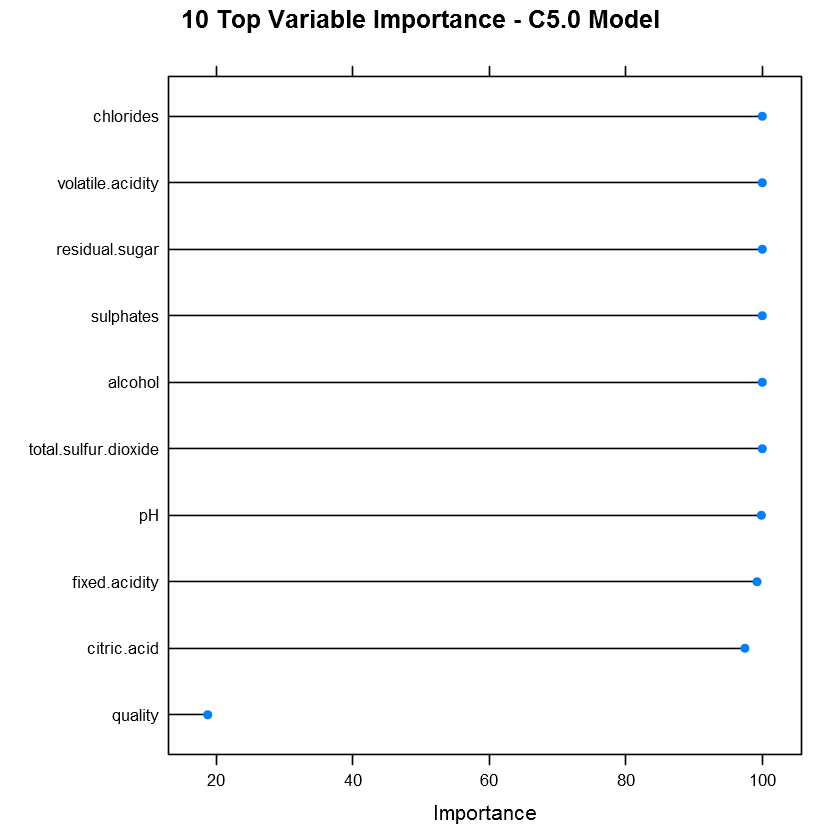

In [66]:
## Graphic variable importance
#dev.new()
plot(c5.imp, top=10, main="10 Top Variable Importance - C5.0 Model")

### 43 Support Vector Machines (SVM)

In [67]:
## Control Resampling Technique: 10-fold CV
cvCtrl <- trainControl(method = "cv", number=10, summaryFunction = twoClassSummary, classProbs = TRUE)

In [68]:
## Construction Predictive Model
set.seed(1)
svmTune <- train(Class ~ ., data = training, method = "svmRadial", tuneLength = 9, preProc = c("center", "scale"), metric = "ROC", trControl = cvCtrl)

Loading required package: kernlab

Attaching package: 'kernlab'

The following object is masked from 'package:ggplot2':

    alpha



In [69]:
## train results
svmTune

Support Vector Machines with Radial Basis Function Kernel 

4549 samples
  10 predictor
   2 classes: 'white', 'red' 

Pre-processing: centered (10), scaled (10) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 4094, 4094, 4095, 4094, 4094, 4094, ... 
Resampling results across tuning parameters:

  C      ROC        Sens       Spec     
   0.25  0.9973074  0.9950420  0.9830357
   0.50  0.9974764  0.9965006  0.9839286
   1.00  0.9977704  0.9970837  0.9857143
   2.00  0.9978196  0.9967913  0.9857143
   4.00  0.9982285  0.9967913  0.9857143
   8.00  0.9988119  0.9970837  0.9848214
  16.00  0.9991975  0.9973752  0.9812500
  32.00  0.9990362  0.9962082  0.9776786
  64.00  0.9989164  0.9959167  0.9758929

Tuning parameter 'sigma' was held constant at a value of 0.09842631
ROC was used to select the optimal model using  the largest value.
The final values used for the model were sigma = 0.09842631 and C = 16.

In [70]:
svmTune$bestTune

,sigma,C
7,0.09842631,16


In [71]:
head(svmTune$results)

sigma,C,ROC,Sens,Spec,ROCSD,SensSD,SpecSD
0.09842631,0.25,0.9973074,0.9950420,0.9830357,0.003872842,0.004568941,0.01543607
0.09842631,0.50,0.9974764,0.9965006,0.9839286,0.003490711,0.003583732,0.01619223
0.09842631,1.00,0.9977704,0.9970837,0.9857143,0.002957338,0.003073157,0.01205265
0.09842631,2.00,0.9978196,0.9967913,0.9857143,0.002909760,0.003210023,0.01408590
0.09842631,4.00,0.9982285,0.9967913,0.9857143,0.002249123,0.003210023,0.01408590
0.09842631,8.00,0.9988119,0.9970837,0.9848214,0.001474294,0.002748716,0.01461064


In [72]:
(svmTune$results)[7,]

,sigma,C,ROC,Sens,Spec,ROCSD,SensSD,SpecSD
7,0.09842631,16,0.9991975,0.9973752,0.98125,0.0009303904,0.002552865,0.01485116


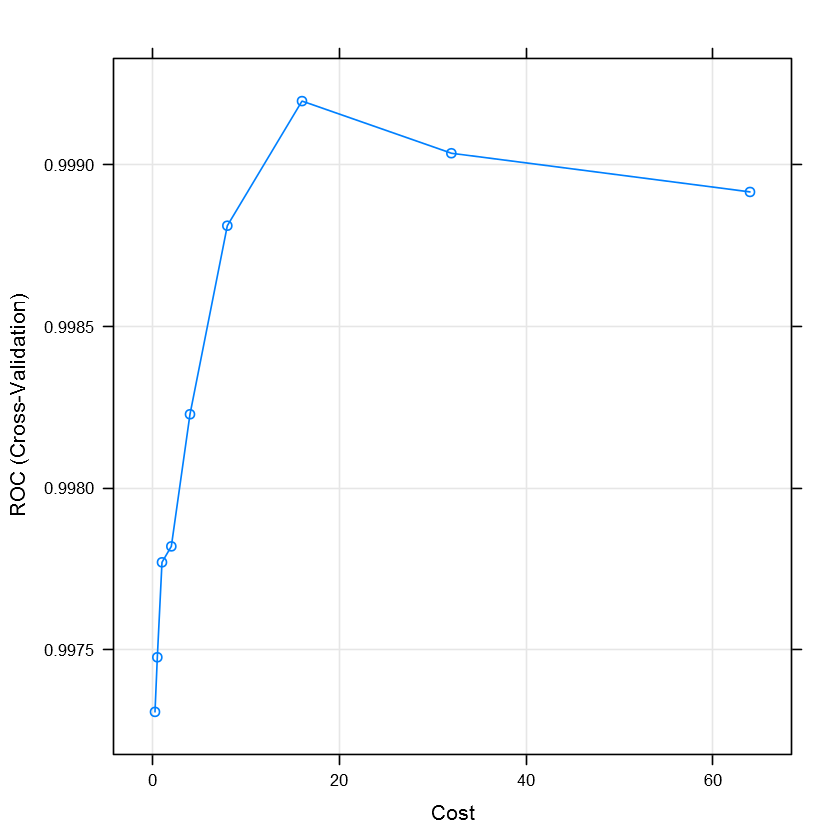

In [73]:
## Plot train tune
plot(svmTune)

In [74]:
## Test Set Results
svmPred <- predict(svmTune, testing, preProc = c("center", "scale"))
confusionMatrix(svmPred, testing$Class)

Confusion Matrix and Statistics

          Reference
Prediction white  red
     white  1467   12
     red       2  467
                                         
               Accuracy : 0.9928         
                 95% CI : (0.988, 0.9961)
    No Information Rate : 0.7541         
    P-Value [Acc > NIR] : < 2e-16        
                                         
                  Kappa : 0.9805         
 Mcnemar's Test P-Value : 0.01616        
                                         
            Sensitivity : 0.9986         
            Specificity : 0.9749         
         Pos Pred Value : 0.9919         
         Neg Pred Value : 0.9957         
             Prevalence : 0.7541         
         Detection Rate : 0.7531         
   Detection Prevalence : 0.7592         
      Balanced Accuracy : 0.9868         
                                         
       'Positive' Class : white          
                                         

In [75]:
## Predicting Class Probabilities
svmProbs <- predict(svmTune, testing, preProc = c("center", "scale"), type = "prob")
head(svmProbs, 3)

white,red
0.9997793,0.0002206800
0.9996541,0.0003459163
0.9996541,0.0003459163


In [77]:
## variable importance
svm.imp = varImp ( svmTune , scale = F)
svm.imp


ROC curve variable importance

                     Importance
total.sulfur.dioxide     0.9517
chlorides                0.9474
volatile.acidity         0.9081
sulphates                0.8280
fixed.acidity            0.7742
pH                       0.7317
residual.sugar           0.6731
citric.acid              0.6177
quality                  0.5858
alcohol                  0.5123

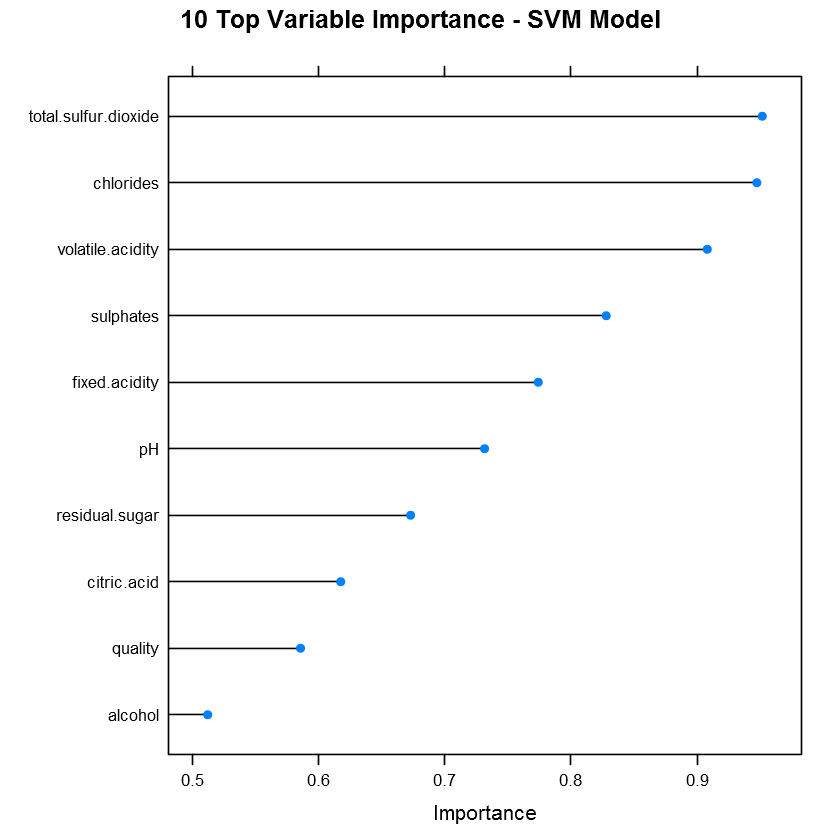

In [78]:
## Graphic variable importance
#dev.new()
plot(svm.imp, top=10, main="10 Top Variable Importance - SVM Model")

### 44 K-Nearest Neighbors (KNN)

In [79]:
## Control Resampling Technique: 10-fold CV
cvCtrl <- trainControl(method = "cv", number=10, summaryFunction = twoClassSummary, classProbs = TRUE)

In [80]:
## Construction Predictive Model
set.seed(1)
knnTune <- train ( Class ~ ., data = training, method = "knn", tuneLength = 10, preProc = c("center", "scale"), metric= "ROC", trControl = cvCtrl)

In [81]:
## train results
knnTune

k-Nearest Neighbors 

4549 samples
  10 predictor
   2 classes: 'white', 'red' 

Pre-processing: centered (10), scaled (10) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 4094, 4094, 4095, 4094, 4094, 4094, ... 
Resampling results across tuning parameters:

  k   ROC        Sens       Spec     
   5  0.9960210  0.9932928  0.9830357
   7  0.9964140  0.9935843  0.9830357
   9  0.9967732  0.9932928  0.9812500
  11  0.9967458  0.9921266  0.9821429
  13  0.9967120  0.9921257  0.9821429
  15  0.9966846  0.9918342  0.9830357
  17  0.9971311  0.9918342  0.9821429
  19  0.9970634  0.9918342  0.9848214
  21  0.9970478  0.9915426  0.9857143
  23  0.9970113  0.9912511  0.9866071

ROC was used to select the optimal model using  the largest value.
The final value used for the model was k = 17.

In [82]:
knnTune$bestTune

,k
7,17


In [83]:
head(knnTune$results)

k,ROC,Sens,Spec,ROCSD,SensSD,SpecSD
5,0.9960210,0.9932928,0.9830357,0.005433019,0.005331419,0.01424225
7,0.9964140,0.9935843,0.9830357,0.005184252,0.005462762,0.01293873
9,0.9967732,0.9932928,0.9812500,0.005016597,0.005838715,0.01599962
11,0.9967458,0.9921266,0.9821429,0.005049735,0.006453031,0.01683588
13,0.9967120,0.9921257,0.9821429,0.005095057,0.005839428,0.01630127
15,0.9966846,0.9918342,0.9830357,0.005080527,0.006417202,0.01599962


In [84]:
(knnTune$results)[7,]

,k,ROC,Sens,Spec,ROCSD,SensSD,SpecSD
7,17,0.9971311,0.9918342,0.9821429,0.003903294,0.006417202,0.01630127


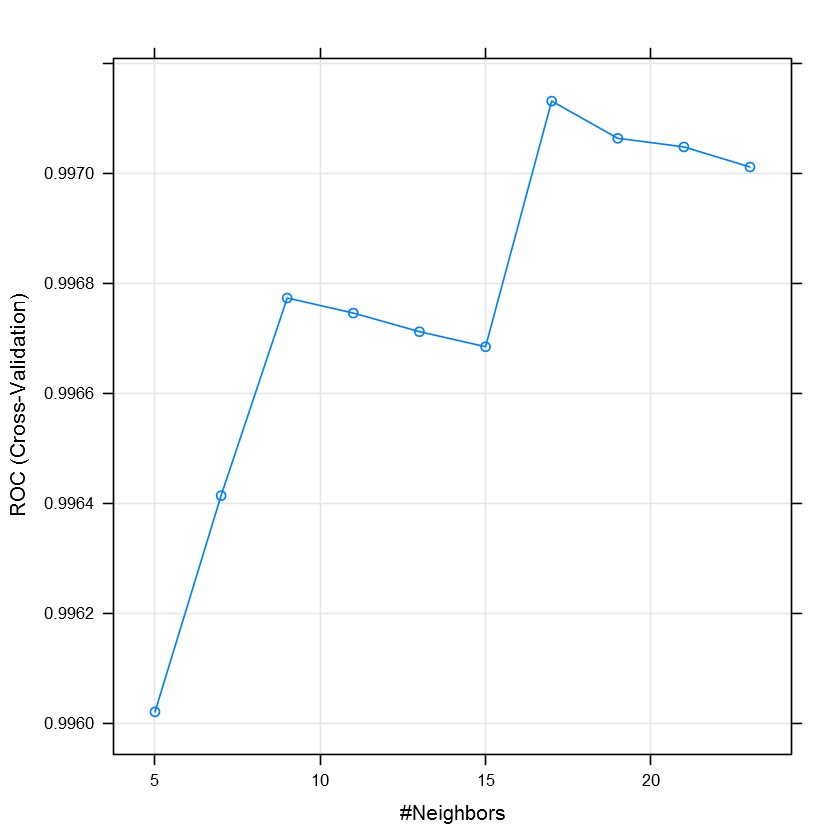

In [85]:
## Plot train tune
plot(knnTune)

In [86]:
## Test Set Results
knnPred <- predict(knnTune, testing, preProc = c("center", "scale"))
confusionMatrix(knnPred, testing$Class)

Confusion Matrix and Statistics

          Reference
Prediction white  red
     white  1457   11
     red      12  468
                                          
               Accuracy : 0.9882          
                 95% CI : (0.9823, 0.9925)
    No Information Rate : 0.7541          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9682          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9918          
            Specificity : 0.9770          
         Pos Pred Value : 0.9925          
         Neg Pred Value : 0.9750          
             Prevalence : 0.7541          
         Detection Rate : 0.7479          
   Detection Prevalence : 0.7536          
      Balanced Accuracy : 0.9844          
                                          
       'Positive' Class : white           
                                          

In [87]:
## Predicting Class Probabilities
knnProbs <- predict(knnTune, testing, preProc = c("center", "scale"), type = "prob")
head(knnProbs, 3)

white,red
1,0
1,0
1,0


In [89]:
## variable importance
knn.imp = varImp ( knnTune , scale = F)
knn.imp

ROC curve variable importance

                     Importance
total.sulfur.dioxide     0.9517
chlorides                0.9474
volatile.acidity         0.9081
sulphates                0.8280
fixed.acidity            0.7742
pH                       0.7317
residual.sugar           0.6731
citric.acid              0.6177
quality                  0.5858
alcohol                  0.5123

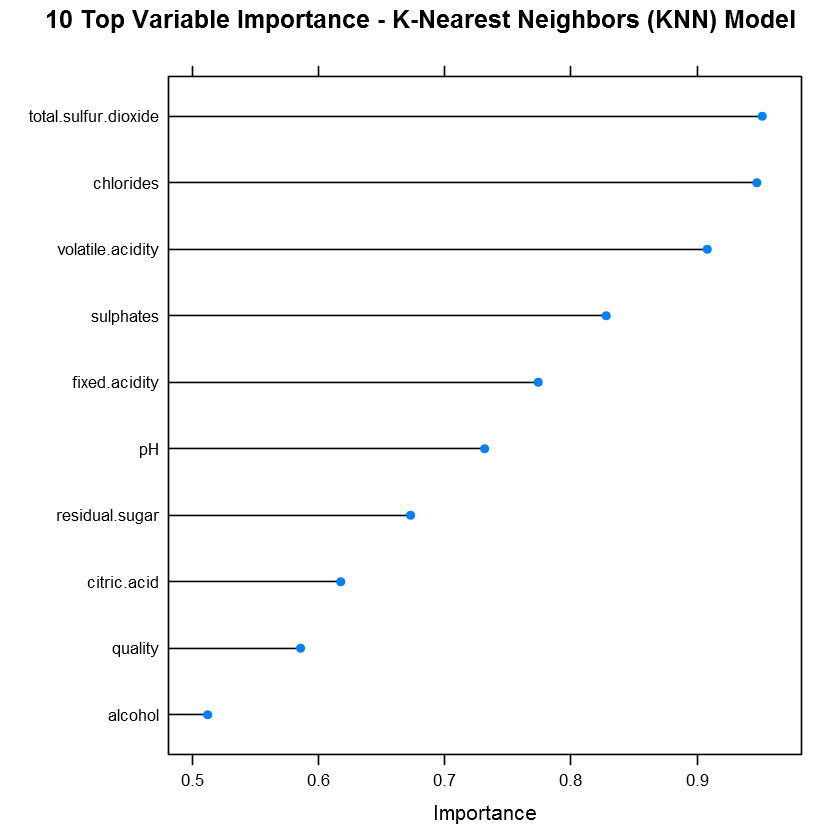

In [90]:
## Graphic variable importance
#dev.new()
plot(knn.imp, top=10, main="10 Top Variable Importance - K-Nearest Neighbors (KNN) Model")

### 45 Random Forest (RF)

In [12]:
## Control Resampling Technique: 10-fold CV
cvCtrl <- trainControl(method = "cv", number=10, summaryFunction = twoClassSummary, classProbs = TRUE, search="grid")

In [13]:
## Construction Predictive Model
set.seed(1)
rfGrid <- expand.grid ( .mtry = c (1:6 ) )
rfTune <- train ( Class ~ ., data = training, method = "rf", tuneGrid = rfGrid, ntree = 1000, preProc = c("center", "scale"), metric= "ROC", trControl = cvCtrl)

Loading required package: randomForest
randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin

The following object is masked from 'package:dplyr':

    combine



In [14]:
## train results
rfTune

Random Forest 

4549 samples
  10 predictor
   2 classes: 'white', 'red' 

Pre-processing: centered (10), scaled (10) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 4094, 4094, 4095, 4094, 4094, 4094, ... 
Resampling results across tuning parameters:

  mtry  ROC        Sens       Spec     
  1     0.9990002  0.9982499  0.9830357
  2     0.9992144  0.9973752  0.9821429
  3     0.9990658  0.9964998  0.9848214
  4     0.9990087  0.9962082  0.9839286
  5     0.9986341  0.9964998  0.9839286
  6     0.9985275  0.9959167  0.9812500

ROC was used to select the optimal model using  the largest value.
The final value used for the model was mtry = 2.

In [94]:
rfTune$bestTune

,mtry
2,2


In [95]:
head(rfTune$results)

mtry,ROC,Sens,Spec,ROCSD,SensSD,SpecSD
1,0.9990002,0.9982499,0.9830357,0.001622493,0.002816988,0.011488249
2,0.9992144,0.9973752,0.9821429,0.001136313,0.003751340,0.011135885
3,0.9990658,0.9964998,0.9848214,0.001288155,0.004722011,0.009458481
4,0.9990087,0.9962082,0.9839286,0.001418871,0.004569424,0.009221389
5,0.9986341,0.9964998,0.9839286,0.002072455,0.004517580,0.009221389
6,0.9985275,0.9959167,0.9812500,0.001992849,0.004600203,0.012938729


In [96]:
(rfTune$results)[2,]

,mtry,ROC,Sens,Spec,ROCSD,SensSD,SpecSD
2,2,0.9992144,0.9973752,0.9821429,0.001136313,0.00375134,0.01113589


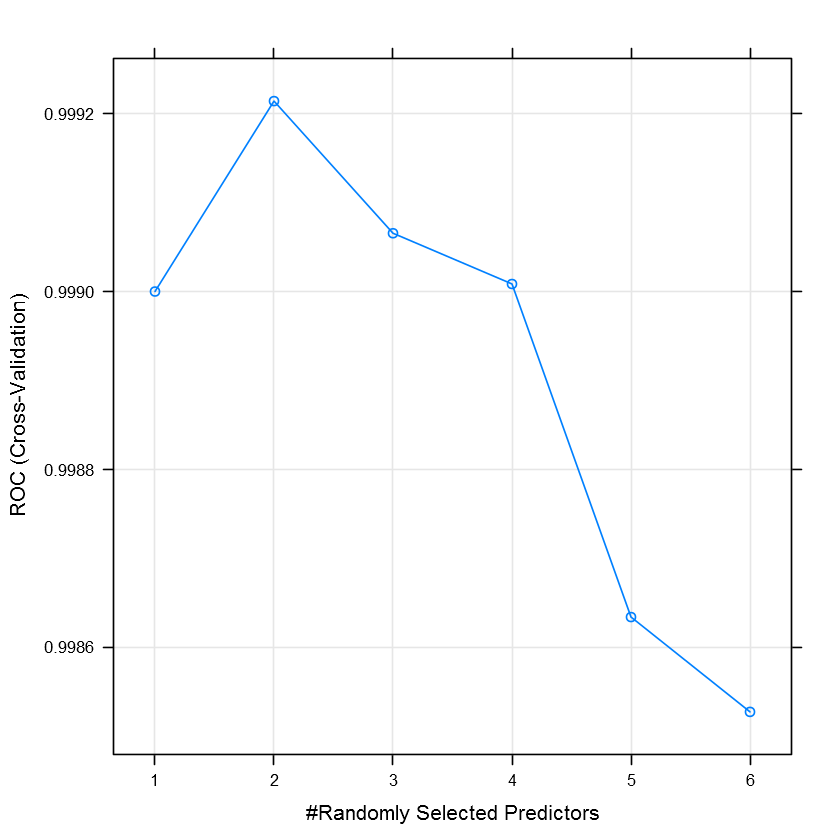

In [97]:
## Plot train tune
plot(rfTune)

In [15]:
## Test Set Results
rfPred <- predict(rfTune, testing, preProc = c("center", "scale"))
confusionMatrix(rfPred, testing$Class)

Confusion Matrix and Statistics

          Reference
Prediction white  red
     white  1467   13
     red       2  466
                                          
               Accuracy : 0.9923          
                 95% CI : (0.9873, 0.9957)
    No Information Rate : 0.7541          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9791          
 Mcnemar's Test P-Value : 0.009823        
                                          
            Sensitivity : 0.9986          
            Specificity : 0.9729          
         Pos Pred Value : 0.9912          
         Neg Pred Value : 0.9957          
             Prevalence : 0.7541          
         Detection Rate : 0.7531          
   Detection Prevalence : 0.7598          
      Balanced Accuracy : 0.9857          
                                          
       'Positive' Class : white           
                                          

In [16]:
## Predicting Class Probabilities
rfProbs <- predict(rfTune, testing, preProc = c("center", "scale"), type = "prob")
head(rfProbs, 3)

,white,red
1,1,0
4,1,0
5,1,0


In [17]:
## variable importance
rf.imp = varImp ( rfTune , scale = F)
rf.imp

rf variable importance

                     Overall
total.sulfur.dioxide  478.64
chlorides             458.14
volatile.acidity      248.78
sulphates             122.00
fixed.acidity         116.44
residual.sugar        106.26
citric.acid            65.14
pH                     57.05
alcohol                25.39
quality                10.06

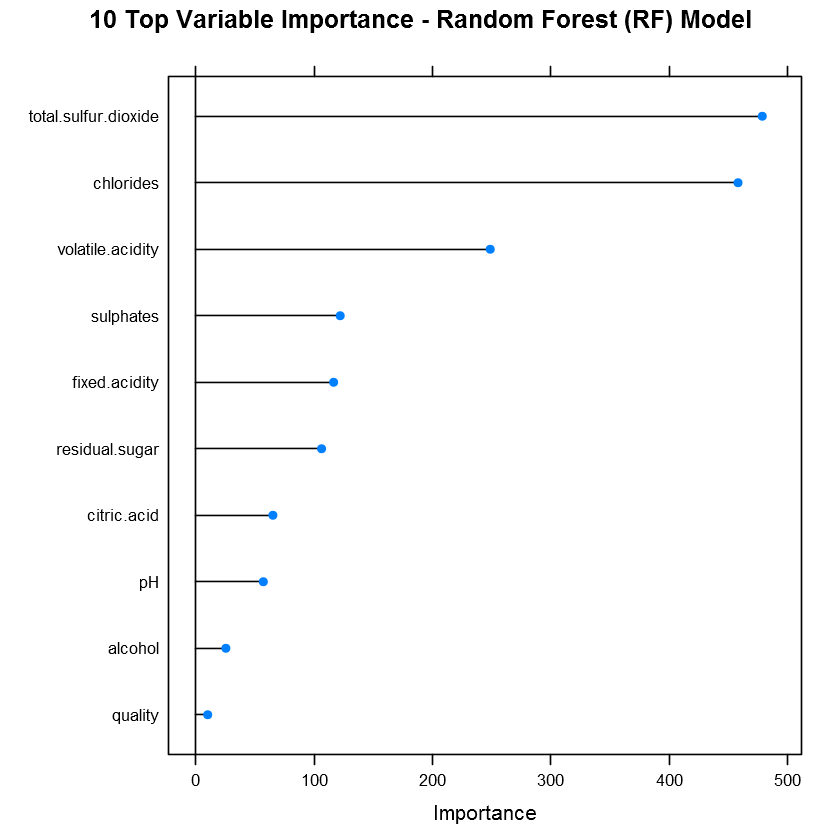

In [18]:
## Graphic variable importance
#dev.new()
plot(rf.imp, top=10, main="10 Top Variable Importance - Random Forest (RF) Model")

## V Selecting best model
 
I have considered nonlinear (CART, C5 BOOSTED TREE, SVM, KNN, and RF) algorithms. I reset the random number seed before each run to ensure that the evaluation of each algorithm is performed using exactly the same data splits. It ensures the results are directly comparable. 
 
We now have 5 models and we need to compare them to each other and select the one with better ROC metric performance.

The k-fold cross-validation method for the metrics was set in k=10. The following table presents the ROC metric measures across the 5 models.

In [105]:
#create comparative table ROC metrics each model
cvmetric1 <- c(round(mean(rpartTune$resample$ROC),6), round(mean(rpartTune$resample$Sens),4),round(mean(rpartTune$resample$Spec),4),round(sd(rpartTune$resample$ROC),4),round(sd(rpartTune$resample$Sens),4),round(sd(rpartTune$resample$Spec),4))

cvmetric2 <- c(round(mean(c5Tune$resample$ROC),6), round(mean(c5Tune$resample$Sens),4),round(mean(c5Tune$resample$Spec),4),round(sd(c5Tune$resample$ROC),4),round(sd(c5Tune$resample$Sens),4),round(sd(c5Tune$resample$Spec),4))

cvmetric3 <- c(round(mean(svmTune$resample$ROC),6), round(mean(svmTune$resample$Sens),4),round(mean(svmTune$resample$Spec),4),round(sd(svmTune$resample$ROC),4),round(sd(svmTune$resample$Sens),4),round(sd(svmTune$resample$Spec),4))

cvmetric4 <- c(round(mean(knnTune$resample$ROC),6), round(mean(knnTune$resample$Sens),4),round(mean(knnTune$resample$Spec),4),round(sd(knnTune$resample$ROC),4),round(sd(knnTune$resample$Sens),4),round(sd(knnTune$resample$Spec),4))

cvmetric5 <- c(round(mean(rfTune$resample$ROC),6), round(mean(rfTune$resample$Sens),4),round(mean(rfTune$resample$Spec),4),round(sd(rfTune$resample$ROC),4),round(sd(rfTune$resample$Sens),4),round(sd(rfTune$resample$Spec),4))

allcvmetrics <- rbind(CART=cvmetric1, c5Boost=cvmetric2, SVM=cvmetric3, KNN=cvmetric4, RF=cvmetric5) 

colnames(allcvmetrics) <- c("ROC","Sensitivity","Specificity","Sd(ROC)","Sd(Sensitivity)","Sd(Specificity)")
(allcvmetrics)


,ROC,Sensitivity,Specificity,Sd(ROC),Sd(Sensitivity),Sd(Specificity)
CART,0.987848,0.9840,0.9607,0.0077,0.0120,0.0128
c5Boost,0.998599,0.9953,0.9857,0.0021,0.0039,0.0121
SVM,0.999198,0.9974,0.9812,0.0009,0.0026,0.0149
KNN,0.997131,0.9918,0.9821,0.0039,0.0064,0.0163
RF,0.999214,0.9974,0.9821,0.0011,0.0038,0.0111


As a general appreciation, all models have very good ROC scores, but the best one corresponds to RF (0.999214).

The following graph presents the ROC curves of each model got it through the testing dataset. So we can see the different ROC's shapes and which of the models has a bigger AUC associated metric. In our case, all models are under RF curve meaning that RF's model performs better even in the testing dataset too.



Call:
roc.default(response = testing$Class, predictor = rfProbs$white,     levels = rev(levels(testing$Class)))

Data: rfProbs$white in 479 controls (testing$Class red) < 1469 cases (testing$Class white).
Area under the curve: 0.9943

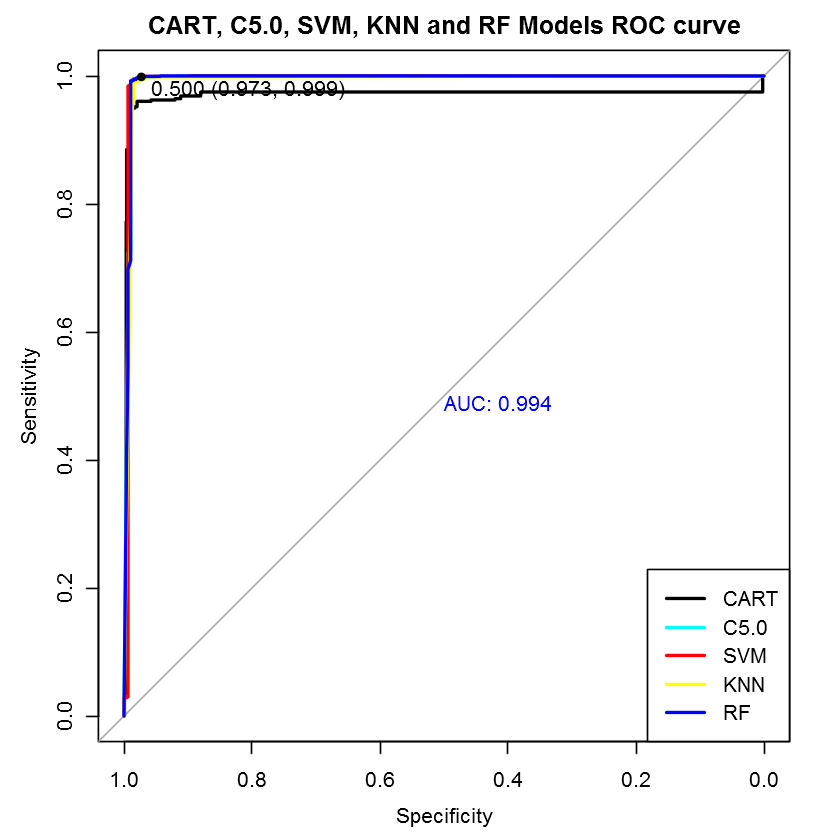

In [106]:
## Creating the ROC Curve
library(pROC)
rfROC <- roc(predictor = rfProbs$white, response = testing$Class, levels = rev(levels(testing$Class)))
rfROC

plot(rpartROC, type = "S", main="CART, C5.0, SVM, KNN and RF Models ROC curve")
plot(c5ROC, add = TRUE,  col = "cyan")
plot(svmROC, add = TRUE, col = "red")
plot(knnROC, add = TRUE, col = "yellow")
plot(rfROC, add = TRUE, print.thres = .5, col = "blue", print.auc=TRUE)
legend("bottomright", legend = c("CART", "C5.0", "SVM", "KNN", "RF"), col = c("black", "cyan", "red", "yellow", "blue"),lwd = 2)

## VI Making predictions
 
The RF algorithm was chosen as the best model that we tested. Now we want to get the predictions from the model on our training dataset.

In [21]:
# print predictions probabilities by row
as.data.frame(rfProbs)

,white,red
1,1.000,0.000
4,1.000,0.000
5,1.000,0.000
6,0.996,0.004
18,0.953,0.047
20,0.996,0.004
23,0.999,0.001
25,0.999,0.001
30,0.992,0.008
34,0.998,0.002


In [22]:
# print validation dataset and predictions by row
(val<-as.data.frame(c(testing,as.data.frame(rfPred))))

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,total.sulfur.dioxide,pH,sulphates,alcohol,quality,Class,rfPred
7.0,0.270,0.36,20.70,0.045,170.0,3.00,0.45,8.8,6,white,white
7.2,0.230,0.32,8.50,0.058,186.0,3.19,0.40,9.9,6,white,white
7.2,0.230,0.32,8.50,0.058,186.0,3.19,0.40,9.9,6,white,white
8.1,0.280,0.40,6.90,0.050,97.0,3.26,0.44,10.1,6,white,white
6.2,0.660,0.48,1.20,0.029,75.0,3.33,0.39,12.8,8,white,white
6.5,0.310,0.14,7.50,0.044,133.0,3.22,0.50,9.5,5,white,white
6.8,0.260,0.42,1.70,0.049,122.0,3.47,0.48,10.5,8,white,white
6.6,0.270,0.41,1.30,0.052,142.0,3.42,0.47,10.0,6,white,white
7.2,0.320,0.36,2.00,0.033,114.0,3.10,0.71,12.3,7,white,white
6.2,0.120,0.34,1.50,0.045,117.0,3.42,0.51,9.0,6,white,white


Now if you want to get the predictions from a new test data, you can see the item 7.4 of my project [MACHINE LEARNING: A comparison of supervised learning algorithms applied to the classification problem with caret R-project library](http://nbviewer.jupyter.org/github/arqmain/Machine_Learning/blob/master/R_MLearning/MLearning_Classification_Comparison_R_Caret/MLearning_Classification_Comparison_R_Caret.ipynb). 

## VII Conclusion

This module of the project develops 5 algorithms of machine learning to classify the wines in white or red according to the 11 variables that characterize the wine subject to classification.

The database -df- does not consider two variables that appear in the original base. They could generate a problem of multicollinearity in the process of classification. So,  we got rid of them in df.

The 5 models proposed achieve a very good metric of classification, reaching all a ROC measurement of at least 99%. That is, the variables of the base allow to discriminate clearly the type of wine that they represent.

The models were developed by tunning some or all of their parameters most of the time.  Anyway, this is modeling so, we can improve the models by filtering other variables, performing more tunning or doing both things at the same time. 

<hr>
By: Hector Alvaro Rojas | Data Science, Visualizations and Applied Statistics | October 12, 2017<br>
Url: [http://www.arqmain.net]   &nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;   GitHub: [https://github.com/arqmain]